In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [5]:
# Load the DataFrame (replace with your actual data loading step)
df = pd.read_csv('./pr_sharing_output_with_patterns_effectiveness_score.csv')
df.head()

,Type,URL,Author,RepoName,RepoLanguage,Number,Title,Body,MergedAt,UpdatedAt,...,CSharing_Status,CSharing_DateOfConversation,CSharing_Title,CSharing_NumberOfPrompts,CSharing_TokensOfPrompts,CSharing_TokensOfAnswers,Conversation_Prompt,Conversation_Answer,Effectiveness_Score,Detected_Patterns
0,0,11,21,10,23,1,140,125,57,62,...,200,22,131,2,38,683,363,886,163.761829,1
1,0,11,21,10,23,1,140,125,57,62,...,200,22,131,2,38,683,363,886,163.761829,1
2,0,11,21,10,23,1,140,125,57,62,...,200,22,131,2,38,683,363,886,163.761829,3
3,0,11,21,10,23,1,140,125,57,62,...,200,22,131,2,38,683,363,886,163.761829,1
4,0,11,21,10,23,1,140,125,57,62,...,200,22,131,2,38,683,363,886,163.761829,1


In [3]:
# Since the dataset is already encoded other than the Conversation_Answer column
#le = LabelEncoder()
#df['Conversation_Answer'] = le.fit_transform(df['Conversation_Answer'])

In [6]:
print(df.columns.tolist())

['Type', 'URL', 'Author', 'RepoName', 'RepoLanguage', 'Number', 'Title', 'Body', 'MergedAt', 'UpdatedAt', 'State', 'Additions', 'Deletions', 'ChangedFiles', 'CommitsTotalCount', 'CSharing_URL', 'CSharing_Status', 'CSharing_DateOfConversation', 'CSharing_Title', 'CSharing_NumberOfPrompts', 'CSharing_TokensOfPrompts', 'CSharing_TokensOfAnswers', 'Conversation_Prompt', 'Conversation_Answer', 'Effectiveness_Score', 'Detected_Patterns']


In [7]:
# Defining the features and target variables on the basis of correlation
#X = df[['Detected Patterns', 'CSharing_TokensOfAnswers', 'CSharing_TokensOfPrompts', 'CSharing_NumberOfPrompts','CSharing_Title',
#        'CSharing_DateOfConversation', 'CSharing_Status', 'CSharing_URL']]
X = df[['Type', 'URL', 'Author', 'RepoName', 'RepoLanguage', 'Number', 'Title', 'Body', 'MergedAt', 'UpdatedAt', 'State', 
        'Additions', 'Deletions', 'ChangedFiles', 'CommitsTotalCount', 'CSharing_URL', 'CSharing_Status', 
        'CSharing_DateOfConversation', 'CSharing_Title', 'CSharing_NumberOfPrompts', 'CSharing_TokensOfPrompts', 
        'CSharing_TokensOfAnswers', 'Conversation_Prompt', 'Conversation_Answer','Detected_Patterns']]
y = df['Effectiveness_Score']

In [8]:
# Scaling all the columns
scaler = StandardScaler()
X[['Type', 'URL', 'Author', 'RepoName', 'RepoLanguage', 'Number', 'Title', 'Body', 'MergedAt', 'UpdatedAt', 'State', 
        'Additions', 'Deletions', 'ChangedFiles', 'CommitsTotalCount', 'CSharing_URL', 'CSharing_Status', 
        'CSharing_DateOfConversation', 'CSharing_Title', 'CSharing_NumberOfPrompts', 'CSharing_TokensOfPrompts', 
        'CSharing_TokensOfAnswers', 'Conversation_Prompt', 'Conversation_Answer','Detected_Patterns']] = scaler.fit_transform(X[['Type', 'URL', 'Author', 'RepoName', 'RepoLanguage', 'Number', 'Title', 'Body', 'MergedAt', 'UpdatedAt', 'State', 
        'Additions', 'Deletions', 'ChangedFiles', 'CommitsTotalCount', 'CSharing_URL', 'CSharing_Status', 
        'CSharing_DateOfConversation', 'CSharing_Title', 'CSharing_NumberOfPrompts', 'CSharing_TokensOfPrompts', 
        'CSharing_TokensOfAnswers', 'Conversation_Prompt', 'Conversation_Answer','Detected_Patterns']])

C:\Users\Dell\AppData\Local\Temp\ipykernel_26536\3944179071.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[['Type', 'URL', 'Author', 'RepoName', 'RepoLanguage', 'Number', 'Title', 'Body', 'MergedAt', 'UpdatedAt', 'State',


In [9]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Model Selection (Random Forest Regressor)
model = RandomForestRegressor(n_estimators=100, random_state=42)

In [11]:
# Model Training
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [12]:
# Model Evaluation
y_pred = model.predict(X_test)

In [13]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.4f}')
print(f'Mean Absolute Error: {mae:.4f}')
print(f'R-squared: {r2:.4f}')

Mean Squared Error: 13.1230
Mean Absolute Error: 0.3584
R-squared: 0.9944


In [14]:
# Feature Importance
feature_importances = model.feature_importances_
feature_names = X.columns
importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

print("Feature Importances:")
print(importance_df)

Feature Importances:
                        Feature  Importance
23          Conversation_Answer    0.312402
22          Conversation_Prompt    0.220361
15                 CSharing_URL    0.073373
14            CommitsTotalCount    0.062624
20     CSharing_TokensOfPrompts    0.049516
21     CSharing_TokensOfAnswers    0.042494
8                      MergedAt    0.028902
5                        Number    0.026908
6                         Title    0.025931
17  CSharing_DateOfConversation    0.023861
7                          Body    0.023796
18               CSharing_Title    0.018957
2                        Author    0.014999
9                     UpdatedAt    0.013844
12                    Deletions    0.011985
11                    Additions    0.011094
1                           URL    0.008504
3                      RepoName    0.007932
10                        State    0.007238
13                 ChangedFiles    0.007160
19     CSharing_NumberOfPrompts    0.006657
4          

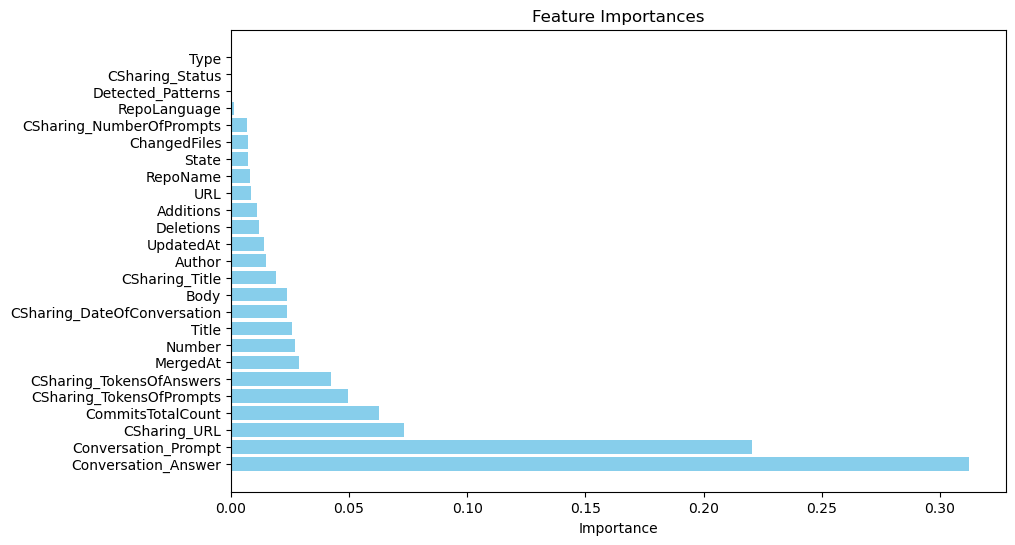

In [15]:
# Visualize feature importance
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()